# Emotions

#### Imports

In [33]:
import json

from transformers import pipeline, logging
import pandas as pd
from kilroyplot.plot import plt

#### Configuration

In [34]:
model = "cardiffnlp/twitter-roberta-base-dec2021-emotion"
batch_size = 256

#### Data

In [35]:
def load_data(path):
    return pd.read_json(path, lines=True)["content"]

In [36]:
def load_model(model, batch_size):
    current_level = logging.get_verbosity()
    logging.set_verbosity_error()
    pipe = pipeline(model=model, batch_size=batch_size, top_k=None)
    logging.set_verbosity(current_level)
    return pipe

In [37]:
def score(data, model):
    all_scores = model(data.values.tolist())
    return pd.DataFrame(
        [
            pd.Series({s["label"]: s["score"] for s in scores})
            for scores in all_scores
        ]
    )

In [38]:
def score_data(path, model):
    data = load_data(path)
    return score(data, model)

In [39]:
model = load_model(model, batch_size)

In [40]:
before = score_data("before.jsonl", model)
after = score_data("after.jsonl", model)

#### Results

In [41]:
def get_emotion_label(emotion):
    return emotion.replace("_", " ").capitalize()

In [42]:
def plot_emotions(
    i,
    n,
    data,
    label,
    x_label="Score",
    y_label="Emotion",
    fmt_emotion=get_emotion_label,
):
    height = 1 / (n + 2)
    scores = data.mean()
    bars_pos = [j - i * height for j in range(len(scores))]
    ticks_pos = [j - ((n - 1) / 2) * height for j in range(len(scores))]
    ticks = [fmt_emotion(emotion) for emotion in scores.index]

    p = plt.barh(bars_pos, scores, height=height, label=label)
    plt.yticks(ticks_pos, ticks)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

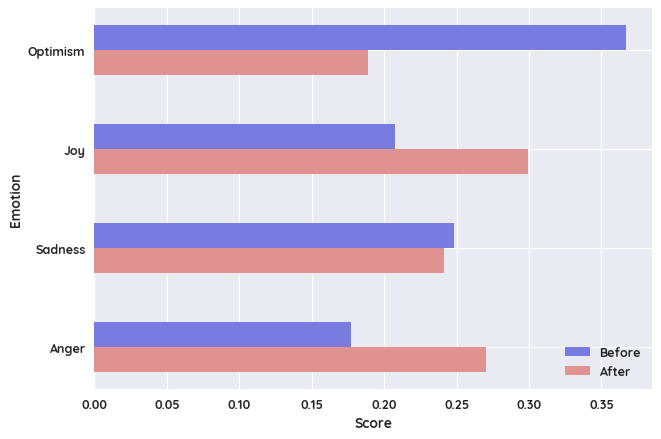

In [43]:
plot_emotions(0, 2, before, "Before")
plot_emotions(1, 2, after, "After")